In [29]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
with open("./data/dump.txt") as f:
    dump = f.read()

In [14]:
def dump_to_stats(dump)->{}:
    
    """
    Get the final rtt stats from a ping dump.
    """
    labels = ["rtt_min", "rtt_avg", "rtt_max", "rtt_mdev"]
    last_line = dump.split("\n")[-2]
    numbers =  [ float(t) for t in re.findall("\d+.\d+",  last_line )  ]
    assert len(labels) == len(numbers) 
    return dict(zip(labels, numbers))

def get_avg_rtt(dump):
        
    """
    Get the average rtt from a ping dump.
    """
    return dump_to_stats(dump)["rtt_avg"]

In [15]:
def line_to_rtt(l)-> float:

    """
    Get the RTT from a single line of a ping-dump.
    Returns 'timeout' if it detects a timeout.
    Returns None if the line does not contain an RTT.
    """
    try:
        return float(re.findall( "time=\d+.\d+" ,l )[0].replace("time=", ""))
    except:
        if "timeout" in l:
            return "timeout"
        return None

In [16]:
def dump_to_rtt_list(dump) -> [float]:
    """
    Get a list of rtts from a ping dump. 
    """
    return [line_to_rtt(l) for l in dump.split("\n")]

# Plot the series of ping RTTs 

In [27]:
s = pd.Series(dump_to_rtt_list(dump))
s = s.apply(lambda x : float(x) if isinstance(x, float) else  np.inf)

<AxesSubplot:title={'center':'Too Lazy To Capitalize Title'}, xlabel='ping number', ylabel='RTT (ms)'>

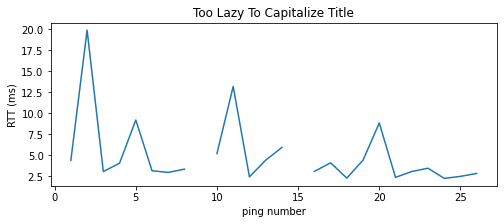

In [52]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_xlabel("ping number")
ax.set_ylabel("RTT (ms)")
ax.set_title("too lazy to capitalize title".title())
s.plot(ax=ax)